# Load GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Pre-requisites

In [3]:
import torch
from IPython.display import Image, clear_output

In [ ]:
!git clone --quiet --depth=1 https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

/content/yolov5
     |████████████████████████████████| 645kB 8.3MB/s 


# System Info

In [ ]:
# Check CUDA info
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print(f'Current device : {torch.cuda.current_device()}')
    for i in range(torch.cuda.device_count()):
        print(f"{torch.cuda.get_device_name(i)}  @  {torch.cuda.device(i)}")
        print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
    print("CPU")

Current device : 0
Tesla T4  @  <torch.cuda.device object at 0x7f7670fe8a50>
Allocated: 0.0 GB
Cached:    0.0 GB


# Test Prediction

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 3c3f8fb torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

100% 14.1M/14.1M [00:00<00:00, 64.7MB/s]

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/2 /content/yolov5/data/image

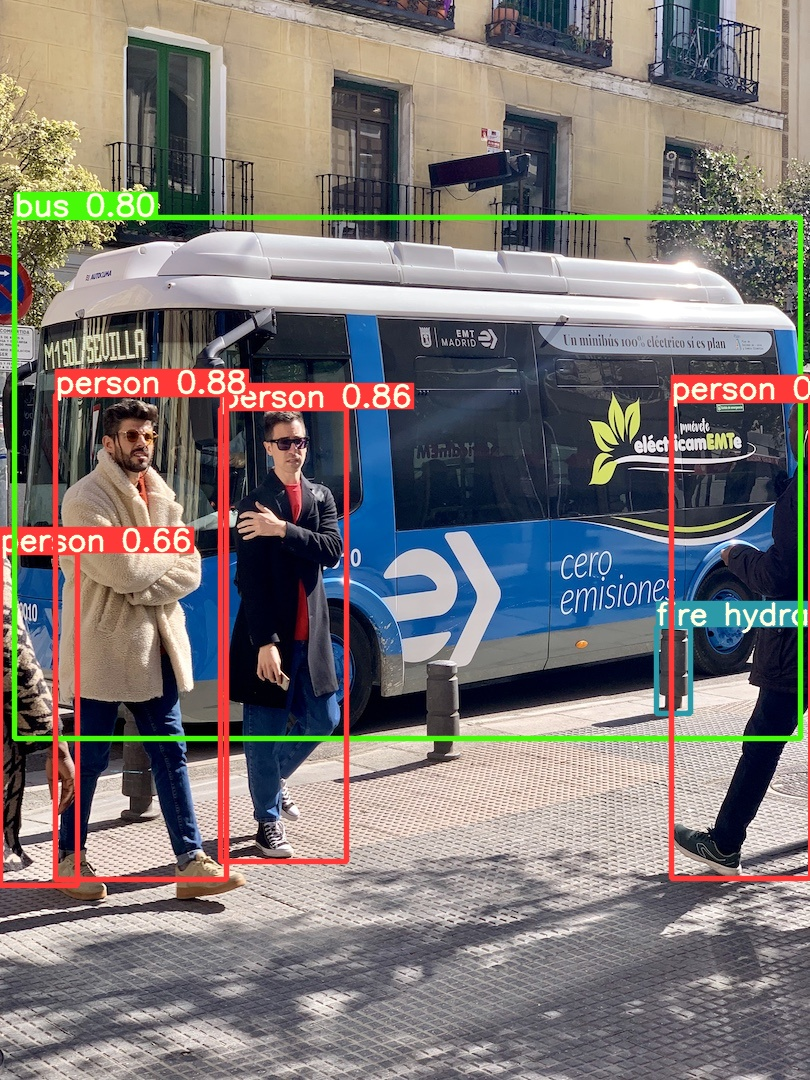

In [ ]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

# Custom OD Traning

In [ ]:
%pip install -q wandb
import wandb
wandb.login()
# While training, check for log at https://wandb.ai/home?utm_campaign=repo_yolo_notebook

In [ ]:
%%shell
wget -q https://raw.githubusercontent.com/theAIGuysCode/yolov4-custom-functions/master/core/functions.py
mkdir data/food
unzip -q -o /content/gdrive/MyDrive/Dataset/Food/train.zip -d ./data/food
unzip -q -o /content/gdrive/MyDrive/Dataset/Food/test.zip -d ./data/food
unzip -q -o /content/gdrive/MyDrive/Dataset/Food/validation.zip -d ./data/food

In [ ]:
%%writefile data/food.yaml

# train and val datasets (image directory or *.txt file with image paths)
# path: data
train: ./data/food/train
val: ./data/food/validation
test: ./data/food/test 

# number of classes
nc: 1

# class names
names: ['Food']

Writing data/food.yaml


In [ ]:
# weight file is automatically fetched from : https://github.com/ultralytics/yolov5/releases
# uncomment `anchor` in hyp file if using --evolve\
# use --exist-ok to replace last run result
!python train.py --data data/food.yaml --cfg models/yolov5l.yaml --weights yolov5l6.pt --hyp data/hyps/hyp.finetune.yaml \
    --img-size 640 640 --batch-size 24 --epochs 200 --workers 8 --save_period -1  \
    --single-cls --cache-images \
    --project /content/gdrive/MyDrive/Backup/YOLOv5/Food --name exp 

train: weights=yolov5l6.pt, cfg=models/yolov5l.yaml, data=data/food.yaml, hyp=data/hyps/hyp.finetune.yaml, epochs=200, batch_size=24, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=True, adam=False, sync_bn=False, workers=8, project=/content/gdrive/MyDrive/Backup/YOLOv5/Food, entity=None, name=exp, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 33202b7 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.0032, lrf=0.12, momentum=0.843, weight_decay=0.00036, warmup_epochs=2.0, warmup_momentum=0.5, warmup_bias_lr=0.05, box=0.0296, cls=0.243, cls_pw=0.631, obj=0.301, obj_pw=0.911, iou_t=0.2, anchor_t=2.91, fl_gamma=0.0, hsv_h=0.0138, hsv_s=0.6

In [ ]:
!python train.py --resume

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, img_size=[640, 640], rect=False, resume=True, nosave=False, notest=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 1 commit. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
Traceback (most recent call last):
  File "train.py", line 660, in <module>
    main(opt)
  File "train.py", line 534, in main
    assert os.path.isfile(ckpt), 'ERROR: --resume checkpoint does not exist'
AssertionError: ERROR: --resume checkpoint does not exist


# Train Log

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir runs/train

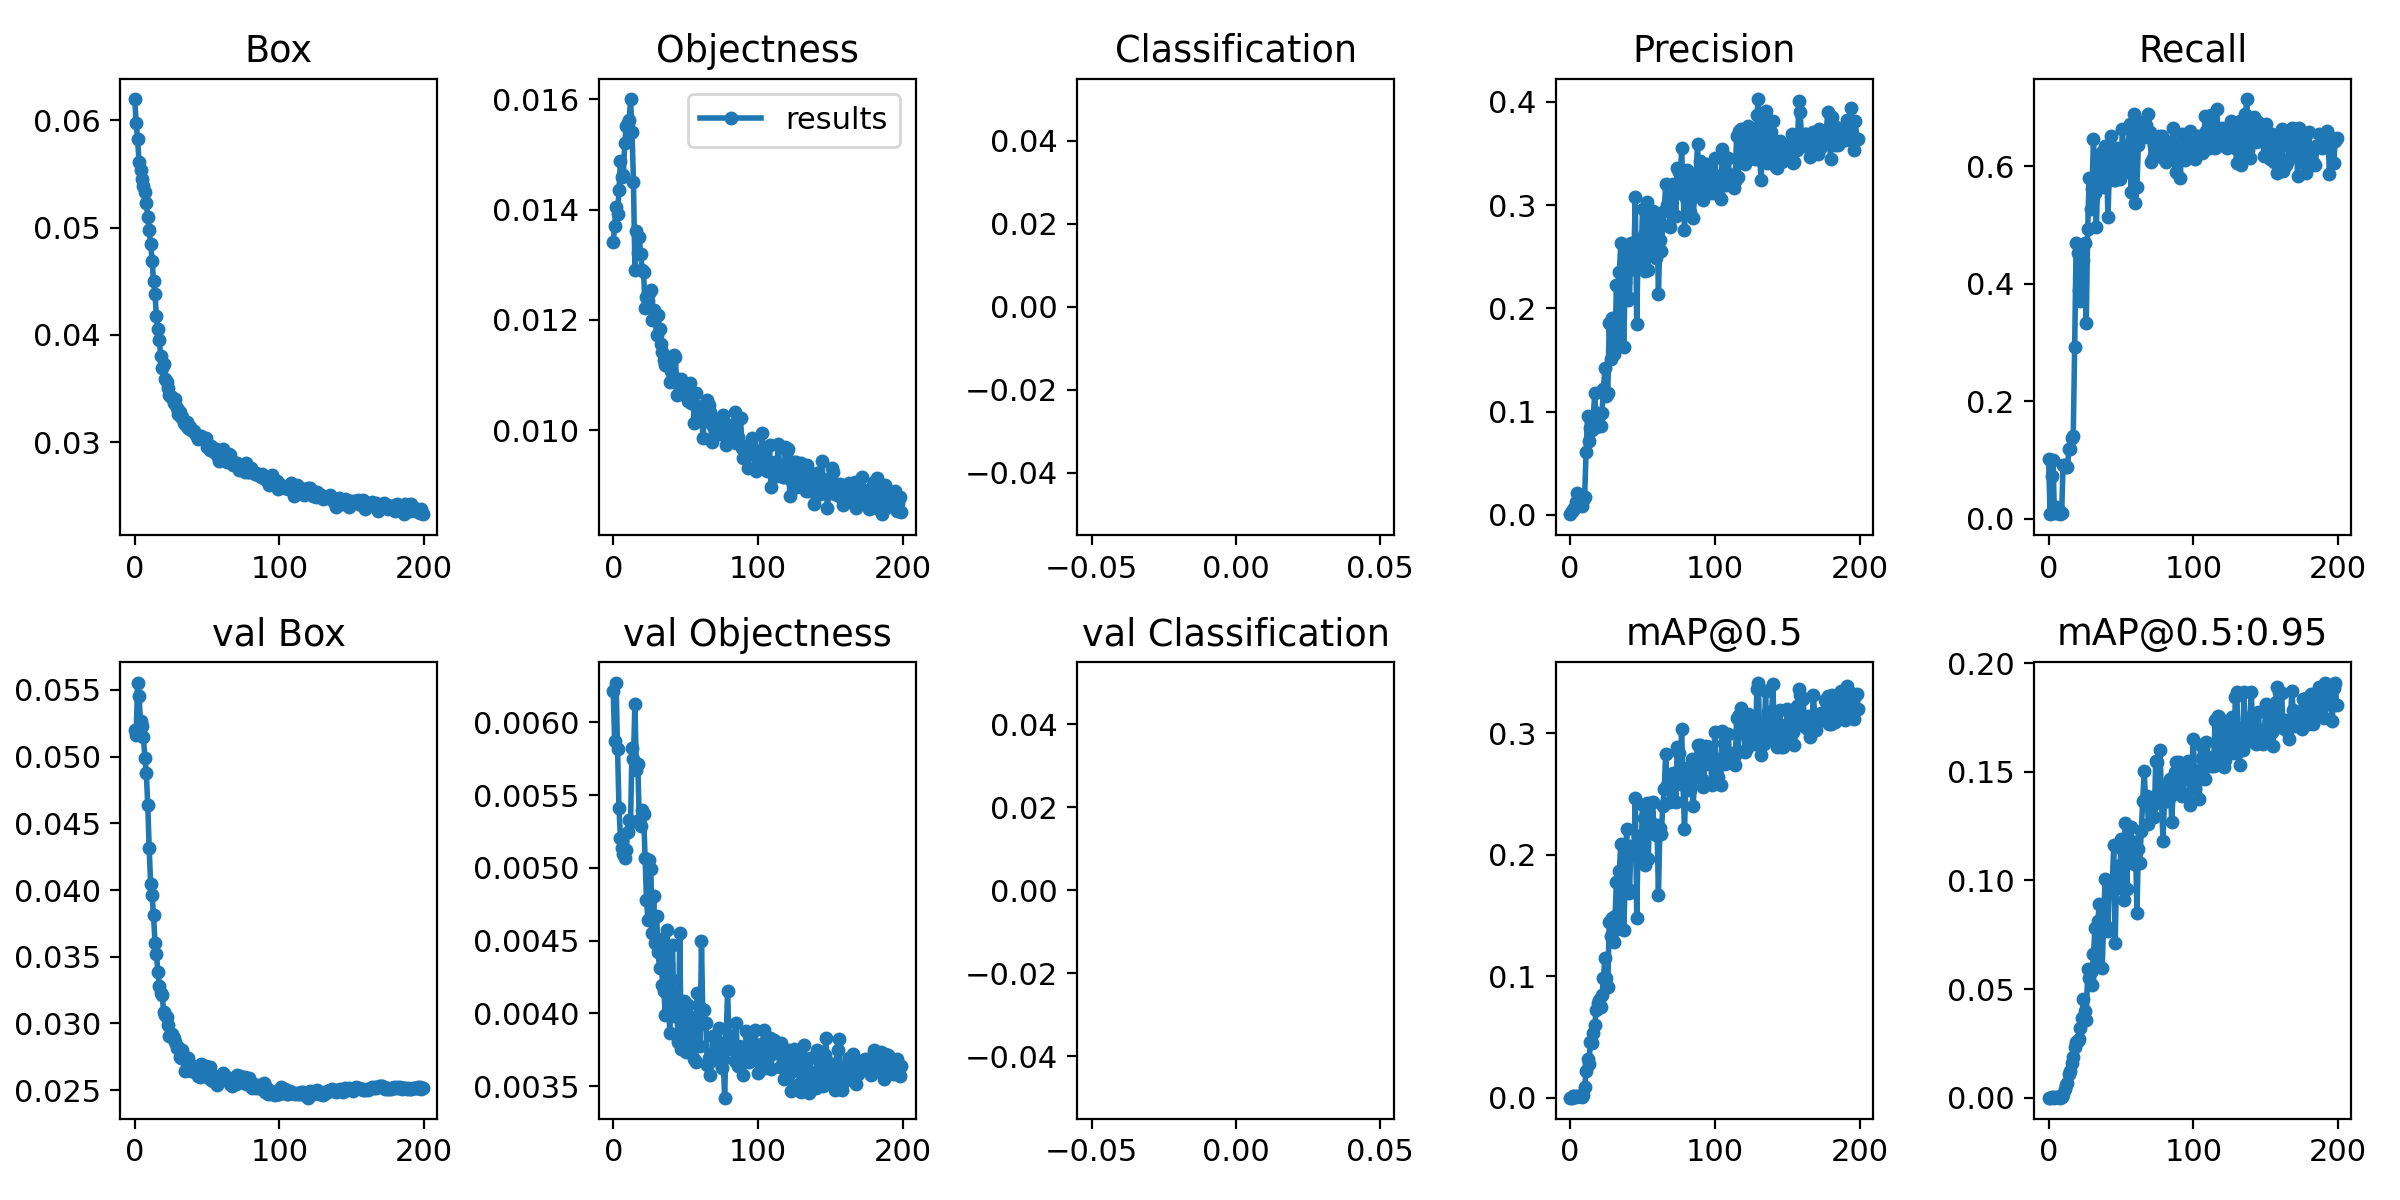

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='/content/gdrive/MyDrive/Backup/YOLOv5/Food/exp')  # plot all results*.txt files
Image(filename='/content/gdrive/MyDrive/Backup/YOLOv5/Food/exp/results.png', width=800)

TRAINING DATA (GROUND TRUTH):


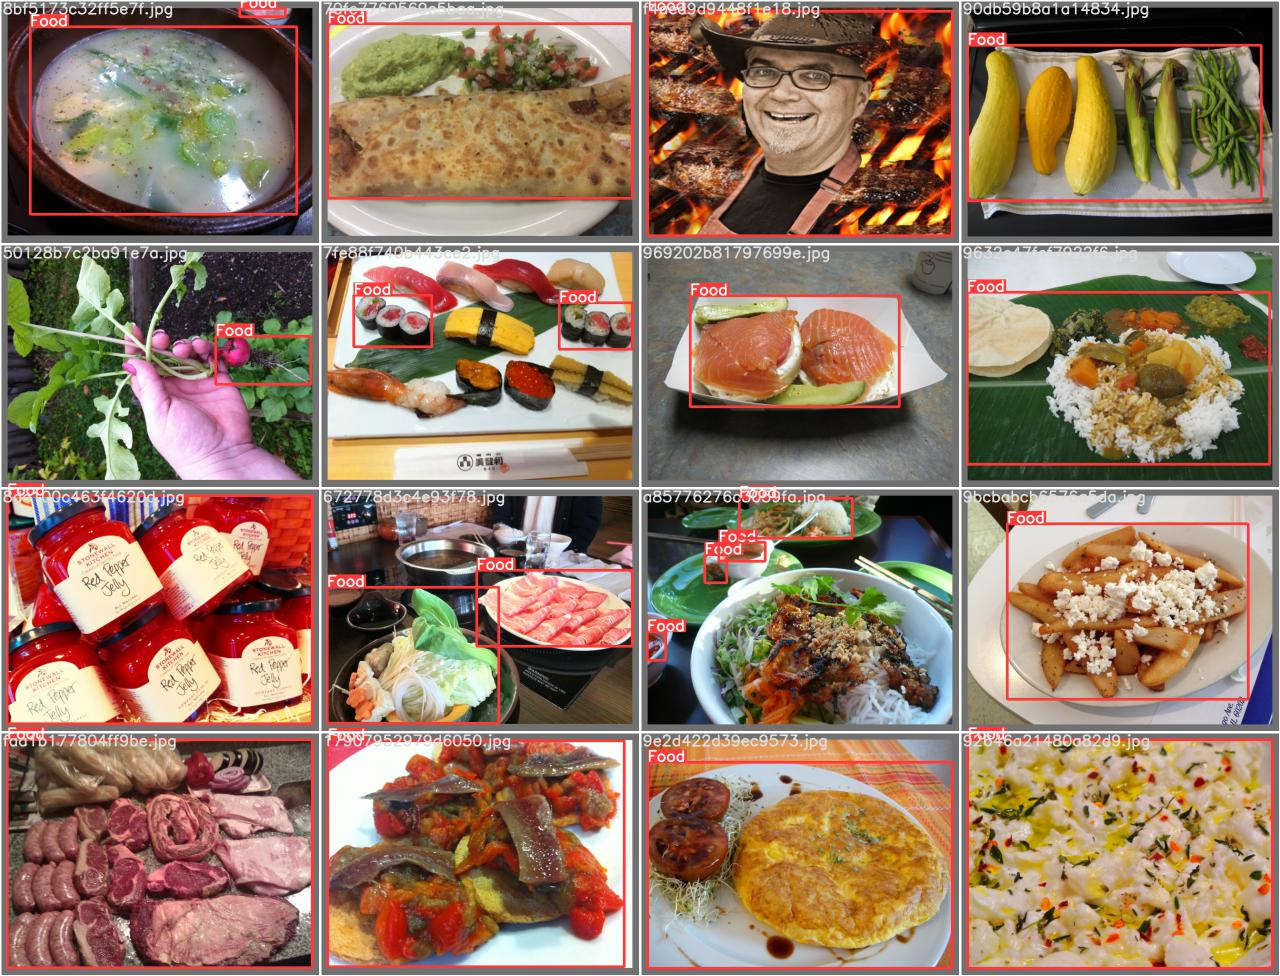

In [5]:
print("TRAINING DATA (GROUND TRUTH):")
Image(filename='/content/gdrive/MyDrive/Backup/YOLOv5/Food/exp/test_batch_labels.jpg', width=900)

PREDICTION:


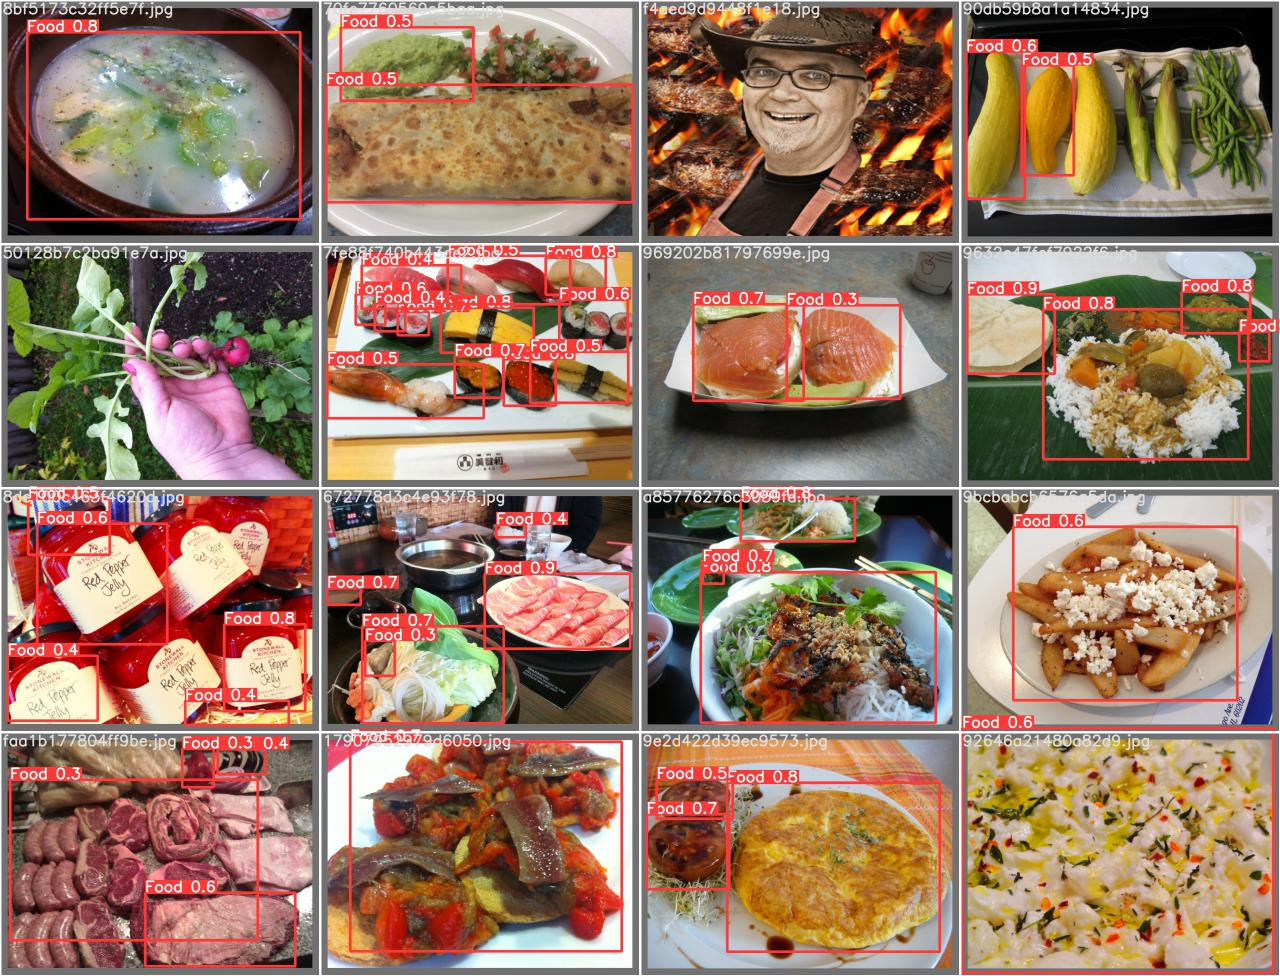

In [4]:
print("PREDICTION:")
Image(filename='/content/gdrive/MyDrive/Backup/YOLOv5/Food/exp/test_batch_pred.jpg', width=900)

# Avoid Colab Disconnection

In [ ]:
from IPython.display import clear_output
import time
i = 0
while True:    
    time.sleep(60)   
    clear_output(wait=True) 
    i += 1
    print(i)

paste this in inspect console to avoid idle kick-out by simulating clicks

```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```